In [24]:
import process
df = process.processed_data()

In [38]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd

colors = df.loc[:,['colorCode', 'returnQuantity']]
colors['10'] = list(pd.cut(colors['colorCode'], range(0, 10001, 10)))
colors['100'] = list(pd.cut(colors['colorCode'], range(0, 10001, 100)))
colors['1000'] = list(pd.cut(colors['colorCode'], range(0, 10001, 1000)))

# Bin purity
Three bins are considered. Splitting by 1000, 100, or 10. Charts are showing each bin's return probability in the top and its count below. To see impurity, mean returnQuantity and standard deviation of the quantity print `dmc.evaluation.features(colors)` or access cuts with `evaluation.loc['1000',:]`.

In [75]:
import matplotlib.pyplot as plt

evaluation = dmc.evaluation.features(colors)

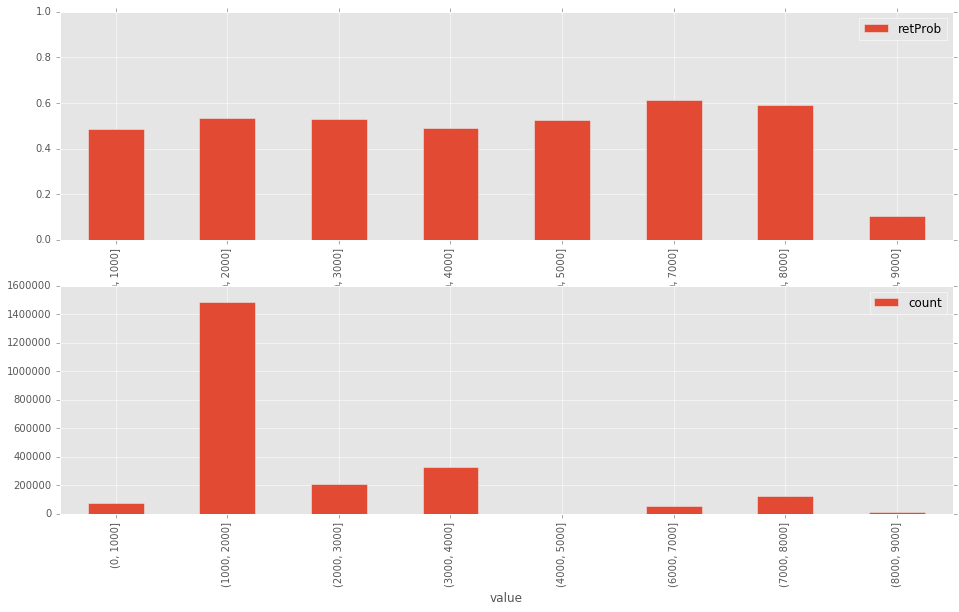

In [76]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches([16, 9])
evaluation.loc['1000', ['retProb']].plot(kind='bar', ax=axes[0], ylim=[0, 1])
evaluation.loc['1000', ['count']].plot(kind='bar', ax=axes[1])

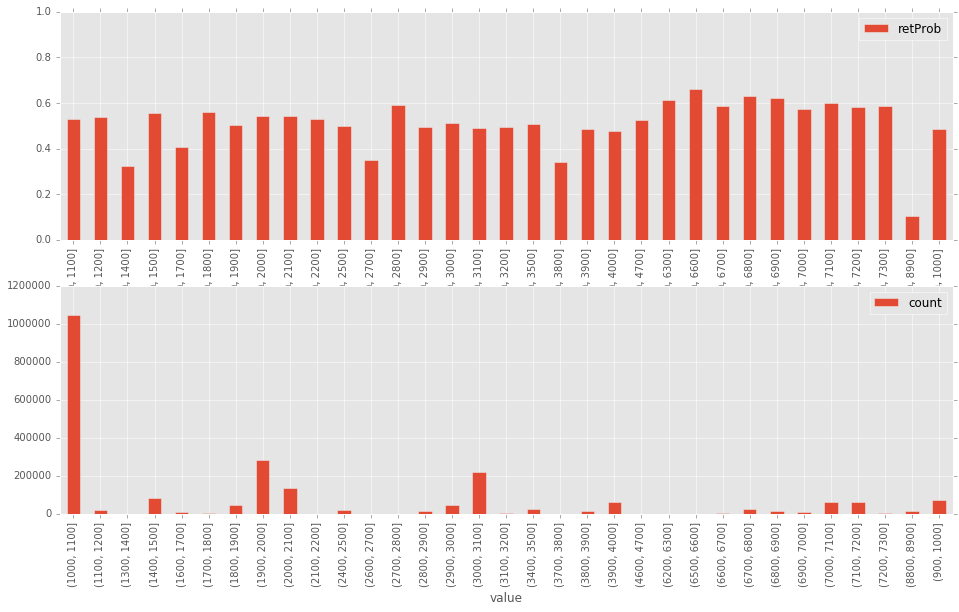

In [77]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches([16, 9])
evaluation.loc['100', ['retProb']].plot(kind='bar', ax=axes[0], ylim=[0, 1])
evaluation.loc['100', ['count']].plot(kind='bar', ax=axes[1])

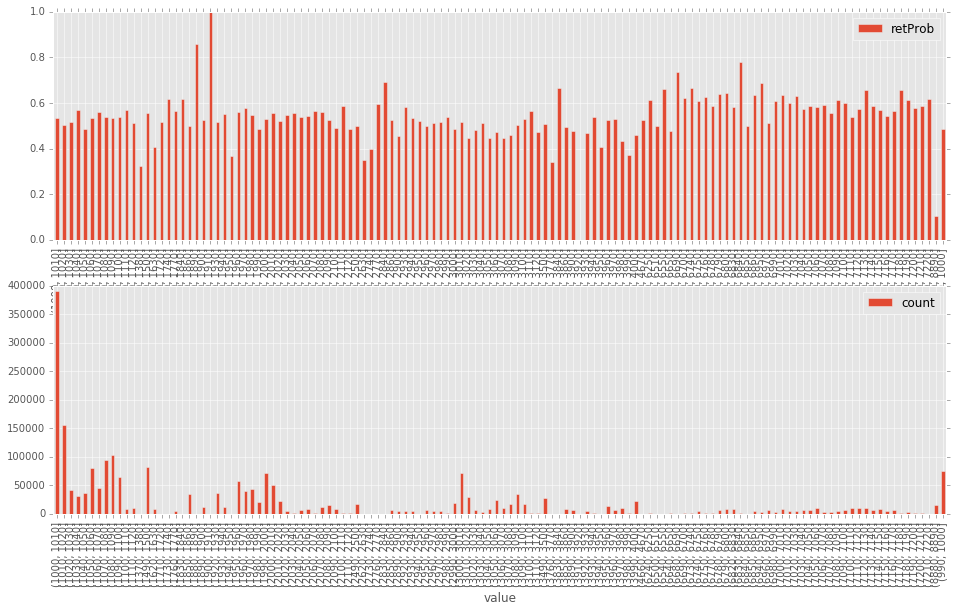

In [78]:
fig, axes = plt.subplots(2,1)
fig.set_size_inches([16, 9])
evaluation.loc['10', ['retProb']].plot(kind='bar', ax=axes[0], ylim=[0, 1])
evaluation.loc['10', ['count']].plot(kind='bar', ax=axes[1])

# Significance
Given a bin size. **How many rows are in a bin that has a significant retProb (one std away from the mean)?**

You can see that binning comes with great information loss.

In [80]:
mean = evaluation.loc['colorCode'].avgRet.mean()
std = evaluation.loc['colorCode'].avgRet.std()
print('mean: ', mean)
print('std: ', std)

mean:  0.547689399474
std:  0.114163825642


In [101]:
split = '1000'
mean_distances = evaluation.loc[split,'retProb'].sub(mean).abs()
outliers = evaluation.loc[split].loc[mean_distances > std]['count']

print(outliers.sum())
outliers.sum() / len(colors)

15169


0.006614866420602415

In [102]:
split = '100'
mean_distances = evaluation.loc[split,'retProb'].sub(mean).abs()
outliers = evaluation.loc[split].loc[mean_distances > std]['count']

print(outliers.sum())
outliers.sum() / len(colors)

24675


0.010760223411455244

In [103]:
split = '10'
mean_distances = evaluation.loc[split,'retProb'].sub(mean).abs()
outliers = evaluation.loc[split].loc[mean_distances > std]['count']

print(outliers.sum())
outliers.sum() / len(colors)

43313


0.018887844239933577

In [104]:
split = 'colorCode'
mean_distances = evaluation.loc[split,'retProb'].sub(mean).abs()
outliers = evaluation.loc[split].loc[mean_distances > std]['count']

print(outliers.sum())
outliers.sum() / len(colors)

104927


0.04575635103926097

# Dynamic binning
Use dynamic binning that considers outliers as seperate bins.

In [106]:
import dmc

colors['binnedColorCode'] = dmc.preprocessing.binned_color_code(colors)
evaluation = dmc.evaluation.features(colors.loc[:,['binnedColorCode', 'returnQuantity']])

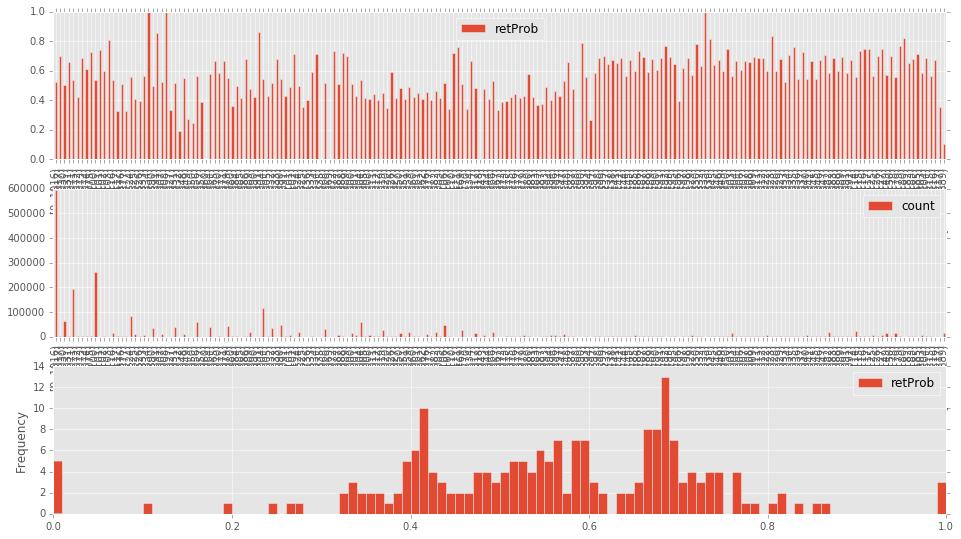

In [121]:
fig, axes = plt.subplots(3,1)
fig.set_size_inches([16, 9])
evaluation.loc['binnedColorCode', ['retProb']].plot(kind='bar', ax=axes[0], ylim=[0, 1])
evaluation.loc['binnedColorCode', ['count']].plot(kind='bar', ax=axes[1])
evaluation.loc['binnedColorCode', ['retProb']].plot(kind='hist', bins=100, ax=axes[2])

In [122]:
split = 'binnedColorCode'
mean_distances = evaluation.loc[split,'retProb'].sub(mean).abs()
outliers = evaluation.loc[split].loc[mean_distances > std]['count']

print(outliers.sum())
outliers.sum() / len(colors)

104897


0.0457432687007668